In [20]:
import numpy as np
import matplotlib.pyplot as plt

import sympy as sp

# x = sp.symbols('x')

# # Function 1: Exponential
# func1 = lambda x: sp.exp(x)
# func1_der = lambda x: sp.diff(func1(x), x)
# func1_double_der = lambda x: sp.diff(func1_der(x), x)

# # Function 2: Quadratic
# func2 = lambda x: 0.5 * x ** 2
# func2_der = lambda x: sp.diff(func2(x), x)
# func2_double_der = lambda x: sp.diff(func2_der(x), x)

# # Function 3: Squared term
# func3 = lambda x: (x / 4) ** 2
# func3_der = lambda x: sp.diff(func3(x), x)
# func3_double_der = lambda x: sp.diff(func3_der(x), x)

# # Function 4: Sine
# func4 = lambda x: sp.sin(x)
# func4_der = lambda x: sp.diff(func4(x), x)
# func4_double_der = lambda x: sp.diff(func4_der(x), x)

In [21]:
import sympy as sp
import numpy as np

def create_functions_and_derivatives(expr):
    # Differentiate the function
    first_derivative = sp.diff(expr, x)
    second_derivative = sp.diff(first_derivative, x)

    # Lambdify the original function and its derivatives
    f = sp.lambdify(x, expr, modules=['numpy'])
    f_prime = sp.lambdify(x, first_derivative, modules=['numpy'])
    f_double_prime = sp.lambdify(x, second_derivative, modules=['numpy'])

    return f, f_prime, f_double_prime

# Symbol definition
x = sp.symbols('x')


# Define your functions as sympy expressions
func1_expr = 5 * sp.exp(-x/2)
func2_expr = 0.5 * x ** 2 - x - 4
func3_expr = 9 * sp.sqrt(1 - (0.25 * x) ** 2)
func4_expr = 3 * sp.sin(x)

# Generate functions and their derivatives
func1, func1_der, func1_double_der = create_functions_and_derivatives(func1_expr)
func2, func2_der, func2_double_der = create_functions_and_derivatives(func2_expr)
func3, func3_der, func3_double_der = create_functions_and_derivatives(func3_expr)
func4, func4_der, func4_double_der = create_functions_and_derivatives(func4_expr)


In [22]:
def func3(x):
    return 9 * np.sqrt(1 - (0.25 * x) ** 2)


def func3_prime(z):
    return (-9 * z) / (4 * np.sqrt(16 - z ** 2))


def func3_double_prime(z):
    return (-36) / ((16 - z ** 2)**1.5)


def func1(x):
    return 5 * np.exp(-x/2)


def func1_prime(x):
    return (-5/2) * np.exp(-x/2)


def func1_double_prime(x):
    return (5/4) * np.exp(-x/2)


def func2(x):
    return 0.5 * x ** 2 - x - 4


def func2_prime(x):
    return x - 1


def func2_double_prime(x):
    return 1


def func4(x):
    return 3 * np.sin(x)


def func4_prime(x):
    return 3 * np.cos(x)


def func4_double_prime(x):
    return -3 * np.sin(x)

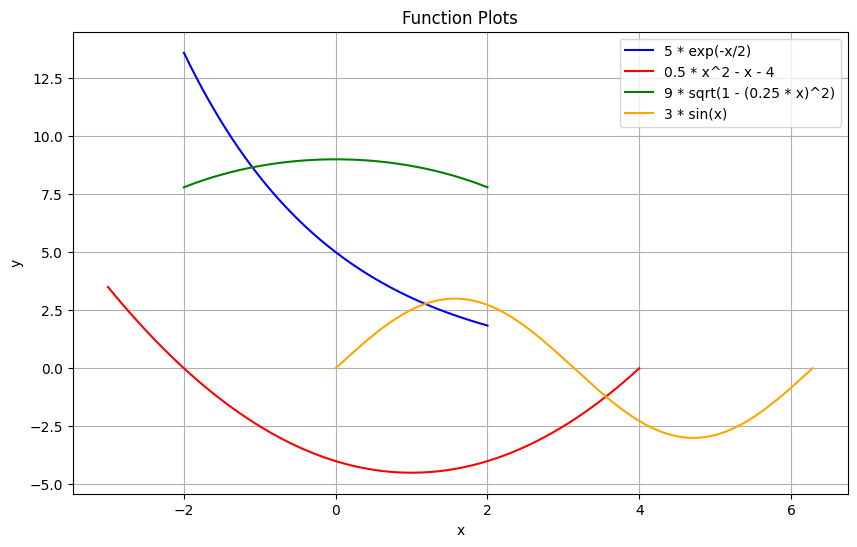

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Setting up the figure
plt.figure(figsize=(10, 6))

# Plotting func1 from -2 to 2
x_range_func1 = np.linspace(-2, 2, 400)
plt.plot(x_range_func1, func1(x_range_func1), label='5 * exp(-x/2)', color='blue')

# Plotting func2 from -3 to 4
x_range_func2 = np.linspace(-3, 4, 400)
plt.plot(x_range_func2, func2(x_range_func2), label='0.5 * x^2 - x - 4', color='red')

# Plotting func3 within its domain (limited by the square root)
# Using a smaller range around zero to avoid complex values
x_range_func3 = np.linspace(2, -2, 400)
plt.plot(x_range_func3, func3(x_range_func3), label='9 * sqrt(1 - (0.25 * x)^2)', color='green')

# Plotting func4 from 0 to 2π
x_range_func4 = np.linspace(0, np.pi * 2, 400)
plt.plot(x_range_func4, func4(x_range_func4), label='3 * sin(x)', color='orange')

# Setting the plot title and labels
plt.title('Function Plots')
plt.xlabel('x')
plt.ylabel('y')

# Adding a legend and grid
plt.legend()
plt.grid(True)

# Displaying the plot
plt.show()


In [24]:
def calculate_vectors(y_prime, y_double_prime, z):

    t_vector = np.array([1, y_prime(z)]) / np.sqrt(1 + (y_prime(z) ** 2))
    
    n_vector = np.array(([y_prime(z), -1]) / np.sqrt(1 +(y_prime(z) ** 2)) * np.sign(-y_double_prime(z)))
    
    return t_vector, n_vector


def combine_vectors(t_vector_start, t_vector_end, n_vector_start, n_vector_end, prev_t, prev_n):

    a1 = np.dot(t_vector_start, t_vector_end)
    a2 = np.dot(n_vector_start, t_vector_end)

    # print(a1, a2)
    
    b1 = np.dot(n_vector_end,t_vector_start )
    b2 = np.dot(n_vector_end,n_vector_start )

    print(b1, b2)

    # print(prev_t)

    t_combined = a1 * prev_t + a2 * prev_n
    
    n_combined = b1 * prev_t + b2 * prev_n

    # return t_combined, n_combined
    return np.row_stack((t_combined, n_combined)).T

In [25]:
z_end_y1 = 2

t_vector_end_y1, n_vector_end_y1 = calculate_vectors(func1_der, func1_double_der, z_end_y1)

B1_vector_end = np.array([z_end_y1, func1(z_end_y1)])
B1_vector_end

array([2.        , 1.83939721])

In [26]:
y1_t_n = np.row_stack((t_vector_end_y1, n_vector_end_y1))
y1_t_n


array([[ 0.73604154, -0.67693637],
       [ 0.67693637,  0.73604154]])

In [27]:
y1_t_n[0,:]

array([ 0.73604154, -0.67693637])

In [28]:
# Calculating vectors for the second figure (y2)
z_start_y2 = -3
z_end_y2 = 4

t_vector_start_y2, n_vector_start_y2 = calculate_vectors(func2_der, func2_double_der, z_start_y2)

t_vector_end_y2, n_vector_end_y2 = calculate_vectors(func2_der, func2_double_der, z_end_y2)

# print(n_vector_end_y2)


# t_combined_y1_y2, n_combined_y1_y2 = combine_vectors(t_vector_start_y2, t_vector_end_y2,  n_vector_start_y2,  n_vector_end_y2, t_vector_end_y1, n_vector_end_y1)

y2_t_n = combine_vectors(t_vector_start_y2, t_vector_end_y2,  n_vector_start_y2,  n_vector_end_y2, t_vector_end_y1, n_vector_end_y1)


# print(y2_t_n)

# y2_t_n = np.row_stack((t_combined_y1_y2, n_combined_y1_y2))
y2_t_n_res_mat =  y1_t_n @ y2_t_n

y2_t_n_res_mat


-0.5368754921931593 -0.8436614877321074


array([[-0.84366149, -0.53687549],
       [ 0.53687549, -0.84366149]])

In [29]:
y2_t_n_res_mat[0,:]

array([-0.84366149, -0.53687549])

In [30]:
z_start_y3 = 2
z_end_y3 = -2

t_vector_start_y3, n_vector_start_y3 = calculate_vectors(func3_der, func3_double_der, z_start_y3)
t_vector_end_y3, n_vector_end_y3 = calculate_vectors(func3_der, func3_double_der, z_end_y3)

y3_t_n  = combine_vectors(t_vector_start_y3,t_vector_end_y3, n_vector_start_y3, n_vector_end_y3,  y2_t_n_res_mat[0,:], y2_t_n_res_mat[1,:])

y3_t_n_res_mat =  y2_t_n @ y3_t_n

y3_t_n_res_mat

0.9667260321314665 -0.2558139534883721


array([[-0.84270171,  0.53838075],
       [-0.53838075, -0.84270171]])

In [31]:
z_start_y4 = 0
z_end_y4 = np.pi * 2

t_vector_start_y4, n_vector_start_y4 = calculate_vectors(func4_der, func4_double_der, z_start_y4)
t_vector_end_y4, n_vector_end_y4 = calculate_vectors(func4_der, func4_double_der, z_end_y4)

y4_t_n = combine_vectors(t_vector_start_y4, t_vector_end_y4,  n_vector_start_y4, n_vector_end_y4,  y3_t_n_res_mat[0, :], y3_t_n_res_mat[1, :])

y4_t_n_res_mat =  y3_t_n @ y4_t_n

y4_t_n_res_mat


8.682572105270932e-18 0.0


array([[-2.57539350e-01, -2.23610398e-18],
       [-9.66267811e-01, -8.38968995e-18]])

In [32]:

B2_vector_end = [4, func2(4)] @ y1_t_n


In [33]:
y2_t_n_res_mat

array([[-0.84366149, -0.53687549],
       [ 0.53687549, -0.84366149]])

In [34]:
 y2_t_n_res_mat[:, 0]

array([-0.84366149,  0.53687549])

In [35]:
endp = y2_t_n_res_mat @  B1_vector_end

In [36]:
endp

array([-2.67485026, -0.4780776 ])

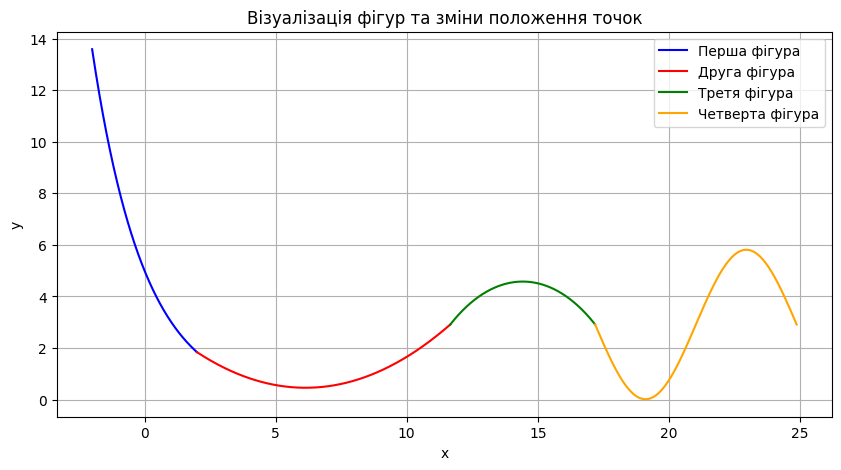

In [57]:
def delta_P_BA_1(z,B, first, second, func, start_z):

    delta_P_local = np.array([z - start_z, func(z) - func(start_z)])

    a_x = delta_P_local[0] * first[0] + delta_P_local[0] * second[0]

    b_x = delta_P_local[1] * first[1] + delta_P_local[1] * second[1]

    res2 = [B[0] + a_x, B[1] + b_x]

    return res2

def delta_P_BA_2(z,B, first, second, func, start_z):

    delta_P_local = np.array([z - start_z, func(z) - func(start_z)])

    a_x = delta_P_local[0] * first[0] + delta_P_local[0] * second[0]

    b_x = delta_P_local[1] * first[1] + delta_P_local[1] * second[1]

    res2 = [B[0] - a_x, B[1] + b_x]

    return res2


def delta_P_BA_3(z,B, first, second, func, start_z):

    delta_P_local = np.array([z - start_z, func(z) - func(start_z)])

    a_x = delta_P_local[0] * first[0] + delta_P_local[0] * second[0]

    b_x = delta_P_local[1] * first[1] + delta_P_local[1] * second[1]

    res2 = [B[0] - a_x, B[1] -  b_x]

    return res2


def delta_P_BA_4(z,B, first, second, func, start_z):

    delta_P_local = np.array([z - start_z, func(z) - func(start_z)])

    a_x = delta_P_local[0] * first[0] + delta_P_local[0] * second[0]

    b_x = delta_P_local[1] * first[1] + delta_P_local[1] * second[1]

    res2 = [B[0] + a_x, B[1] - b_x]

    return res2


z_points = np.linspace(-3, 4, 500)


delta_positions = [delta_P_BA_4(z, B1_vector_end, y2_t_n_res_mat[:, 0], y2_t_n_res_mat[:, 1],  func2, 4) for z in z_points]

x_new_2 = [ point[0]  for point in delta_positions]
y_new_2 = [ point[1] for point in delta_positions]

B1_vector_end_2 = np.array([x_new_2[0], y_new_2[0]])

z_points_y3 = np.linspace(2, -2, 500)

delta_positions_for_y3 = [delta_P_BA_4(z, B1_vector_end_2, y3_t_n_res_mat[1, :],  y3_t_n_res_mat[:, 0], func3, 2) for z in z_points_y3]

x_for_y3 = [point[0] for point in delta_positions_for_y3]
y_for_y3 = [point[1] for point in delta_positions_for_y3]


B1_vector_end_3 = np.array([x_for_y3[-1], y_for_y3[0]])

z_points_y4 = np.linspace(0, np.pi * 2, 500)

delta_positions_for_y4 = [delta_P_BA_2(z, B1_vector_end_3, y4_t_n_res_mat[:, 0] , y4_t_n_res_mat[1,:] , func4, 0) for z in z_points_y4]

x_for_y4 = [point[0] for point in delta_positions_for_y4]
y_for_y4 = [point[1] for point in delta_positions_for_y4]


# Візуалізація
plt.figure(figsize=(10, 5))A
x_range_y1 = np.linspace(-2, 2, 500)
plt.plot(x_range_y1, func1(x_range_y1), label='Перша фігура', color='blue')
plt.plot(x_new_2, y_new_2, label='Друга фігура', color='red')
plt.plot(x_for_y3, y_for_y3, label='Третя фігура', color='green')
plt.plot(x_for_y4, y_for_y4, label='Четверта фігура', color='orange')



plt.title('Візуалізація фігур та зміни положення точок')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
B1_vector_end_3

array([12.88104272,  2.91314819])